In [1]:
import jieba
import jieba.analyse
import re
import math
import pandas as pd
import matplotlib.pyplot as plt

#將來源轉換成jieba
def jieba_file(path):
    
    
    text=open(path,"r",encoding='utf8').read()
    text=text.lower()
    #將特殊符號全部換成空格
    exc={'=','!','\"','\'','#','$','%','@','^','&','(',')','+','-','*','/','\\',',','.',':',';','д','，','<','>','[',']','{','}','|','~','?','？','！','。','_'}
    for ch in exc:
        text=text.replace(ch," ")   
    text=jieba.cut_for_search(text)
    
    return text

#計算來源行數
def textcount(path):
    count=0
    text=open(path,'r',encoding='utf8')
    while 1:
        buffer=text.read(8*1024*1024)
        if not buffer:
            break
        count+=buffer.count('\n')
    return count

#將jieba轉換成字典，以字典形式統計每個單詞的出現次數
def jieba_dic(text):
    count={}
    for word in text:
        count[word]=count.get(word,0)+1
    exc={' ','\t','\n'}
    for word in exc:
        del count[word]
    
    return count

def get_tf(dic,lencount):
    tf={}
    for word in dic:
        tf[word] = round(dic[word]/lencount,10)
    
    return tf
        
def get_idf(dic,textlines):
    idf=dic
    for word in dic:
        a=dic[word]
        idf[word]=math.log((textlines/a),10)
    return idf

def get_tfidf(tf,idf,dic):
    tfidf=dic
    for word in dic:
        a=tf[word]
        b=idf[word]
        tfidf[word]=round(a*b,10)
    return tfidf
    
def sort100(ob):
    item=list(ob.items())
    item.sort(key=lambda x:x[1],reverse=True)
    return item

def TF_IDF_figure(temp):
    
    most100=temp[0:99]
    df = pd.DataFrame(most100, columns = ["word", "TF-IDF"]) 
    print('前100個高權重：')
    print(df) #印出表格
    chart = df.plot(  kind='bar',
                    title='Word TF-IDF Analysis',  #圖表標題
                    xlabel='Word',  #x軸說明文字
                    ylabel='TF-IDF',  #y軸說明文字
                    legend=True,  # 是否顯示圖例
                    figsize=(25, 10))  # 圖表大小
    plt.show()

def counter_figure(temp):

    most100=temp[0:99]
    df = pd.DataFrame(most100,columns = ["word", "frequency"]) 
    print('前100個高頻字詞：')
    print(df) #印出表格
    chart = df.plot(  kind='bar',
                    title='Word Frequency Analysis',  #圖表標題
                    xlabel='Word',  #x軸說明文字
                    ylabel='Frequency',  #y軸說明文字
                    legend=True,  # 是否顯示圖例
                    figsize=(25, 10))  # 圖表大小
    plt.show()
        

#main
textname="test.txt"

NLPtext=jieba_file(textname)
textcounts=textcount(textname)
print(textcounts,'行\n') #顯示行數 



count=jieba_dic(NLPtext)

lencount=0

#計算總詞彙數量
for word in count: 
    lencount=lencount+count[word]



tf = get_tf(count,lencount)
idf = get_idf(count,textcounts)
tfidf = get_tfidf(tf,idf,count)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Wei\AppData\Local\Temp\jieba.cache


45 行



Loading model cost 0.762 seconds.
Prefix dict has been built successfully.


前100個高頻字詞：
    word  frequency
0      o   0.067460
1      的   0.050265
2      有   0.026455
3      嗎   0.017196
4      是   0.015873
..   ...        ...
94    最難   0.001323
95     聽   0.001323
96    哪首   0.001323
97  中華民國   0.001323
98    根本   0.001323

[99 rows x 2 columns]


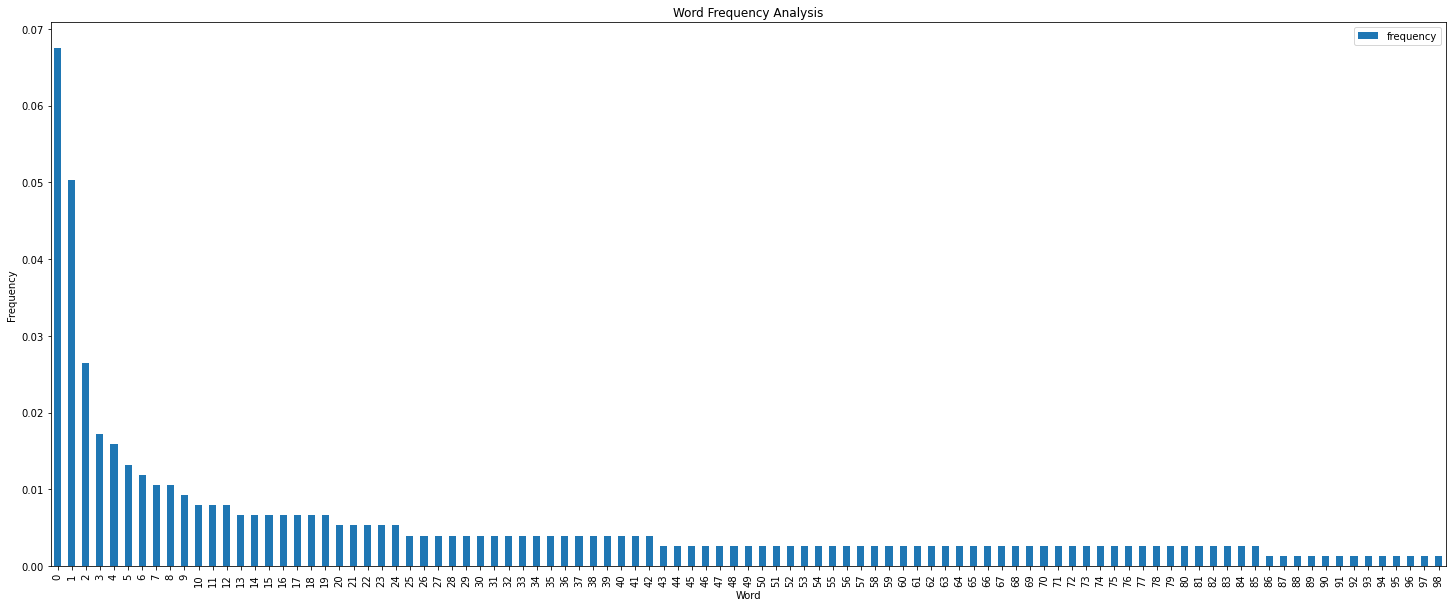

In [2]:
tf=sort100(tf)
counter_figure(tf)

前100個高權重：
    word    TF-IDF
0      有  0.009317
1      嗎  0.009273
2      是  0.009112
3      了  0.008640
4      沒  0.008321
..   ...       ...
94     聽  0.002187
95    哪首  0.002187
96  中華民國  0.002187
97    根本  0.002187
98    出山  0.002187

[99 rows x 2 columns]


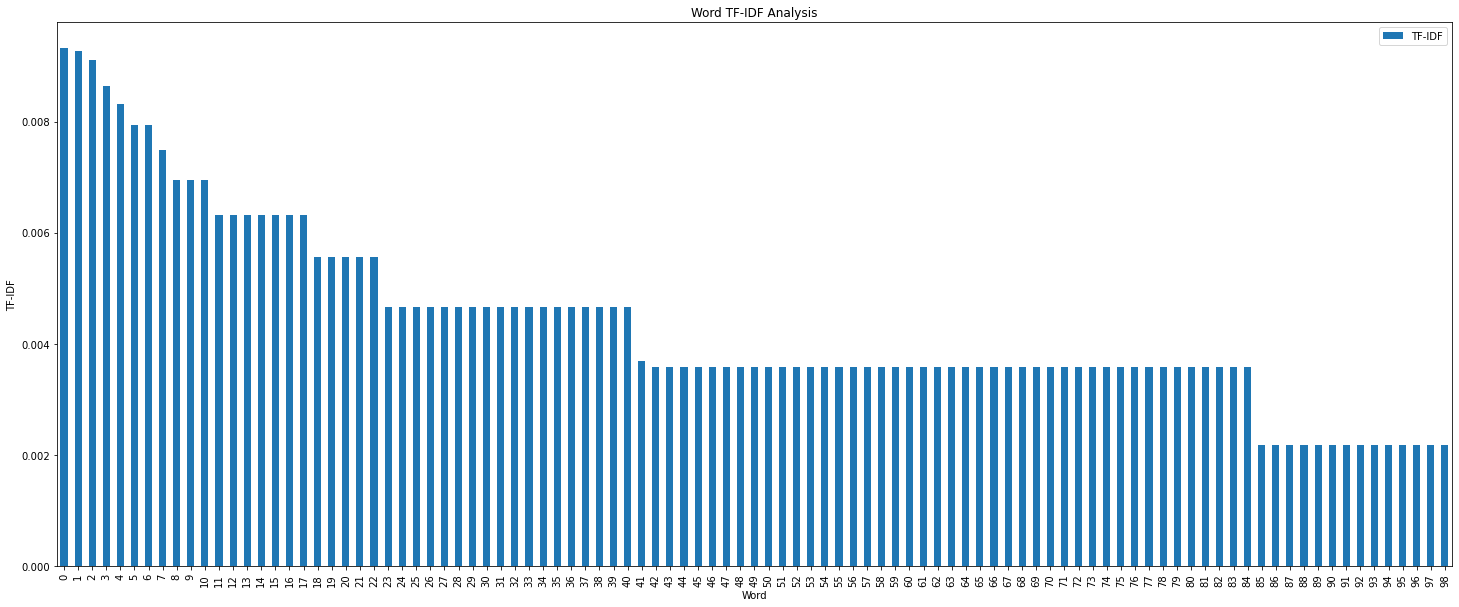

In [3]:
tfidf=sort100(tfidf)
TF_IDF_figure(tfidf)